## SC1015 Project

Why are some songs more popular than others? What makes a song popular? In this project, we utilize the Song Popularity Dataset on Kaggle to find out if the popularity of a song can be determined by acoustic data such as acousticness, danceability, liveliness and energy.

We aim to:
1. Accurately predict how popular songs are/will be based upon their characteristics. (Testing on songs in the Spotify Music Dataset)
2. Demonstrate how relevant our predictions are in real life by predicting the popularity of songs on the Billboard top 100 and checking whether their popularity is reflected y the predictions of our model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

Create a dataframe from the dataset

In [2]:
#songdata = pd.read_csv('data/knn_songs.csv', index_col=0)
songdata = pd.read_csv('data/genre_music.csv')
songdata = songdata.sort_values(['track'])
#songdata = songdata.sort_values(["decade"], ascending = (False))
songdata.head(20)

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
11343,"""""Cherry Cherry"""" from Hot August Night",Neil Diamond,0.341,0.94800,9,-5.081,1,0.1360,0.10100,0.001480,0.8740,0.6320,171.578,443.320,4,53.79041,16,1,70s,rock
4669,"""""Come, Sleep...""""",Louise Bogan,0.734,0.06940,3,-24.330,1,0.9170,0.61100,0.000000,0.1060,0.3190,108.734,78.472,5,31.28651,4,0,60s,rap
21253,"""""I'll Be Back"""" / Police Station & Escape",Brad Fiedel,0.201,0.39100,7,-16.067,1,0.0479,0.88900,0.864000,0.1110,0.1810,59.801,226.310,4,38.29173,10,0,80s,rock
39054,"""""Is This My Fate,"""" He Asked Them",Story Of The Year,0.254,0.97000,8,-4.635,1,0.0789,0.00015,0.005860,0.1410,0.1660,99.963,300.520,4,55.19977,13,0,10s,rock
15187,"""""Jerry"""" To The Rescue",Pino Donaggio,0.215,0.24200,0,-15.141,0,0.0398,0.58400,0.936000,0.1460,0.0613,116.234,143.520,4,25.60898,9,0,70s,rock
2495,"""""Joseph, lieber Joseph mein""""",Traditional,0.282,0.05950,7,-26.589,1,0.0415,0.99300,0.849000,0.1070,0.2010,76.620,110.173,4,32.82781,7,0,60s,rock
6039,"""""Móvil"""" Oil Special",Victor Jara,0.544,0.62900,10,-11.324,1,0.1770,0.86700,0.000006,0.3470,0.5860,108.040,167.834,4,79.72459,7,0,60s,pop
4877,"""""Tragic"""" Overture, Op. 81: Allegro ma non tr...",National Philharmonic Orchestra,0.193,0.12300,2,-16.581,0,0.0397,0.97900,0.881000,0.0848,0.0936,83.204,697.387,4,49.61964,30,0,60s,rock
34927,$ave Dat Money,Lil Dicky Featuring Fetty Wap & Rich Homie Quan,0.858,0.69700,2,-5.361,1,0.2300,0.11400,0.000000,0.2240,0.3640,98.012,290.836,4,38.04379,13,1,10s,rap
6348,' Cello Song,Nick Drake,0.507,0.39000,3,-17.218,1,0.0326,0.65700,0.859000,0.0613,0.5200,118.805,284.987,4,41.96860,11,0,60s,r&b


In [3]:
print("Shape: ", songdata.shape)
songdata.dtypes

Shape:  (41099, 20)


track                object
artist               object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_s          float64
time_signature        int64
chorus_hit          float64
sections              int64
popularity            int64
decade               object
genre                object
dtype: object

In [4]:
songdata.info

<bound method DataFrame.info of                                             track             artist  \
11343     ""Cherry Cherry"" from Hot August Night       Neil Diamond   
4669                           ""Come, Sleep...""       Louise Bogan   
21253  ""I'll Be Back"" / Police Station & Escape        Brad Fiedel   
39054          ""Is This My Fate,"" He Asked Them  Story Of The Year   
15187                     ""Jerry"" To The Rescue      Pino Donaggio   
...                                           ...                ...   
34817                                        胜者为王                 窒息   
31872                                    薔薇と彼女の王子   Heartsrevolution   
38777                                         还有谁                 窒息   
32309                                          迷彩       Sheena Ringo   
40103                                          雏鹰                 窒息   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
11343         0.341  0.9

### Step 1
Clean the dataset to remove duplicate songs.

Reference: https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

In [5]:
songdata.groupby(['genre']).count()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade
genre,,,,,,,,,,,,,,,,,,,
edm,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515
latin,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870
pop,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460
r&b,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040
rap,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364
rock,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850


We can use the _duplicated()_ function to find duplicates in the dataset. As can be seen from the sum, there are 5,765 duplicated rows with the same track variable value.

In [6]:
songdata.track.duplicated().sum()

5246

View duplicate rows:

In [7]:
songdata.loc[songdata.track.duplicated(), :]

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
13562,'Buked and Scorned',Big Joe Williams,0.452,0.239,4,-17.514,0,0.0463,0.6890,0.000195,0.6820,0.673,92.399,322.173,4,50.14461,14,0,70s,r&b
1284,'Round Midnight,Gerald Wilson Orchestra,0.503,0.227,3,-16.926,0,0.0314,0.8440,0.665000,0.1030,0.208,109.100,312.893,4,26.91597,13,0,60s,r&b
6521,'Round Midnight,Sonny Rollins,0.424,0.205,10,-13.869,0,0.0290,0.9050,0.780000,0.1240,0.164,97.331,239.707,4,23.07802,11,0,60s,pop
34567,(I Can't Get No) Satisfaction,Sky Saxon,0.531,0.850,2,-5.379,1,0.0415,0.0031,0.000000,0.1530,0.739,134.945,236.947,4,40.80212,7,0,00s,pop
11879,(I Know) I'm Losing You,Rare Earth,0.463,0.553,6,-14.648,1,0.0465,0.5730,0.000037,0.3150,0.715,100.608,215.987,4,28.63916,9,1,70s,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,Água De Beber,Antônio Carlos Jobim,0.717,0.209,4,-20.825,0,0.0519,0.7430,0.885000,0.0752,0.907,135.681,170.627,4,45.61740,10,0,60s,pop
8656,Águas De Marco,Elis Regina,0.611,0.322,3,-13.666,1,0.2870,0.8020,0.000044,0.1210,0.857,150.686,185.773,4,42.88205,10,0,70s,rap
24742,Águas De Março,Antônio Carlos Jobim,0.652,0.377,3,-14.848,1,0.1760,0.8450,0.000001,0.1030,0.506,143.767,212.493,4,35.39803,11,0,90s,pop
20781,Águas De Março,Antônio Carlos Jobim,0.649,0.321,3,-16.751,1,0.1280,0.7780,0.000000,0.0943,0.572,143.719,211.627,4,35.36344,13,0,80s,pop


Finally, to drop the duplicate rows, we can use the _drop_duplicates()_ function to drop the rows with duplicates from the dataframe. We set `keep` to `first` to keep only the first occurrence of the row, and set `inplace=True` to update the original dataframe. 

In [8]:
songdata.drop_duplicates(subset=['track'], keep='first', inplace=True)
print('New shape: ', songdata.shape)
songdata.head()

New shape:  (35853, 20)


,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
11343,"""""Cherry Cherry"""" from Hot August Night",Neil Diamond,0.341,0.9480,9,-5.081,1,0.1360,0.10100,0.00148,0.874,0.6320,171.578,443.320,4,53.79041,16,1,70s,rock
4669,"""""Come, Sleep...""""",Louise Bogan,0.734,0.0694,3,-24.330,1,0.9170,0.61100,0.00000,0.106,0.3190,108.734,78.472,5,31.28651,4,0,60s,rap
21253,"""""I'll Be Back"""" / Police Station & Escape",Brad Fiedel,0.201,0.3910,7,-16.067,1,0.0479,0.88900,0.86400,0.111,0.1810,59.801,226.310,4,38.29173,10,0,80s,rock
39054,"""""Is This My Fate,"""" He Asked Them",Story Of The Year,0.254,0.9700,8,-4.635,1,0.0789,0.00015,0.00586,0.141,0.1660,99.963,300.520,4,55.19977,13,0,10s,rock
15187,"""""Jerry"""" To The Rescue",Pino Donaggio,0.215,0.2420,0,-15.141,0,0.0398,0.58400,0.93600,0.146,0.0613,116.234,143.520,4,25.60898,9,0,70s,rock


We have about 2945 unique songs. We can probably parse the song name and categorized it by language as well.

### Step 2
Perform exploratory analysis on the acoustic data of the songs.

> Use the following code to identify other non-English languages in Song Name among the 13070 records

In [ ]:
songdata = songdata.sort_values(["decade"], ascending = (False))
songdata.head(50)

In [ ]:
# Summary Statistics for numeric Variables
songdata.describe().round(3)

In [ ]:
songdata.info()

In [ ]:
# Draw the box-plot distribution of all 14 numeric variables

# import data about boxplots from matplotlib (since SeaBorn uses MatPlotLib for plotting)
from matplotlib.cbook import boxplot_stats  
f, axes = plt.subplots(20, 1, figsize=(18, 30))

count = 0

print("Sequence of Box Plots: ")
for var in songdata:
    if(var != "track" and var != "artist" and var != "decade" and var != "genre"):
        #print(var)
        print(count, ") ", var)
        print("Number of outliers = ", len(boxplot_stats(songdata[var]).pop(0)['fliers']), "\n")
        sb.boxplot(data = songdata[var], orient = "h", ax = axes[count], fliersize = 8.0)
        axes[0].set_title(var)
    count += 1

#sb.boxplot(data = songdata['danceability'], orient = "h", ax = axes[0], fliersize = 8.0)
#axes[0].set_title('danceability')

#sb.boxplot(data = songdata['energy'], orient = "h", ax = axes[1], fliersize = 8.0)
#axes[0].set_title('energy')


In [ ]:
# Draw the histogram & violin plot distributions of all 4 variables
f, axes = plt.subplots(15, 3, figsize=(18, 30))

print("Sequence of Plots: ")
count = 0
for var in songdata:
    if(var != "track" and var != "artist" and var != "decade" and var != "genre"):
        print(count, ") ", var)
        sb.boxplot(data = songdata[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = songdata[var], ax = axes[count,1])
        sb.violinplot(data = songdata[var], orient = "h", ax = axes[count,2])
        count += 1

        print("Skewness: {:.3f}".format(songdata[var].skew()))
        print("Kurtosis: {:.3f}".format(songdata[var].kurt()))

In [ ]:
# Correlation Matrix
print(songdata.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(28, 28))
sb.heatmap(songdata.corr(), vmin = -1, vmax = 1, linewidths = 10,
           annot = True, fmt = ".2f", annot_kws = {"size": 24}, cmap = "RdBu")

Let's try to plot the scatter plots of Song Popularity against Instrumentalness and Danceability

In [ ]:
f, ax = plt.subplots(figsize=(18,12))
# = sb.scatterplot(x = "instrumentalness", y = "song_popularity", hue="danceability", data = songdata, palette="Greens", size="danceability")
ax = sb.scatterplot(x = "danceability", y = "popularity", data = songdata)

#ax.legend(loc='upper right')
ax.set_title('Song Popularity against Instrumentalness & Danceability', fontsize = 20, loc='center')
#ax.set_xlabel('Instrumentalness', fontsize = 16)
ax.set_xlabel('Danceability', fontsize = 16)
ax.set_ylabel('Song Popularity', fontsize = 16)

### Since no clear correlation is found on univariate linear regression, we use Feedforward Neural Network (Multi-layer Perceptron)


... results are as follows

MLPClassifier predicts classes that inputs fall into, and therefore we need to classify the song_popularity values and label encode them.

In [9]:
popularity_class = []

#for var in songdata['song_popularity']:
#   if(0 <= var and var <= 50):
#        popularity_class.append(0)
#    else:
#        popularity_class.append(1)

#songdata['popularity_class'] = popularity_class
#songdata.head()

from sklearn.preprocessing import LabelEncoder

# label encoding song_popularity
songdata['genre'] = LabelEncoder().fit_transform(songdata['genre'])
songdata.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
11343,"""""Cherry Cherry"""" from Hot August Night",Neil Diamond,0.341,0.9480,9,-5.081,1,0.1360,0.10100,0.00148,0.874,0.6320,171.578,443.320,4,53.79041,16,1,70s,5
4669,"""""Come, Sleep...""""",Louise Bogan,0.734,0.0694,3,-24.330,1,0.9170,0.61100,0.00000,0.106,0.3190,108.734,78.472,5,31.28651,4,0,60s,4
21253,"""""I'll Be Back"""" / Police Station & Escape",Brad Fiedel,0.201,0.3910,7,-16.067,1,0.0479,0.88900,0.86400,0.111,0.1810,59.801,226.310,4,38.29173,10,0,80s,5
39054,"""""Is This My Fate,"""" He Asked Them",Story Of The Year,0.254,0.9700,8,-4.635,1,0.0789,0.00015,0.00586,0.141,0.1660,99.963,300.520,4,55.19977,13,0,10s,5
15187,"""""Jerry"""" To The Rescue",Pino Donaggio,0.215,0.2420,0,-15.141,0,0.0398,0.58400,0.93600,0.146,0.0613,116.234,143.520,4,25.60898,9,0,70s,5


We now need to scale the predictor variables so that they can be used together to predict the popularity_class.

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'valence', 'mode', 'speechiness', 'chorus_hit', 'sections']] = MinMaxScaler().fit_transform(songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'valence', 'mode', 'speechiness', 'chorus_hit', 'sections']])

songdata.drop(columns=['popularity', 'track', 'artist', 'decade', 'time_signature', 'sections'], inplace=True)
songdata.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,chorus_hit,genre
count,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000
mean,0.543350,0.577640,5.198393,0.734854,0.691351,0.077077,0.370930,0.161870,0.192366,0.542389,0.494077,235.412968,0.092798,2.755167
std,0.181269,0.254805,3.533529,0.101619,0.461942,0.091748,0.342750,0.309411,0.176929,0.270009,0.121035,122.663760,0.044278,1.301983
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.168000,0.000000,0.000000
25%,0.421053,0.391847,2.000000,0.685378,0.000000,0.035313,0.039458,0.000000,0.082252,0.327309,0.402551,172.213000,0.063651,2.000000
50%,0.555668,0.598899,5.000000,0.753590,1.000000,0.045625,0.268072,0.000143,0.120690,0.558233,0.486246,217.627000,0.082863,2.000000
75%,0.676113,0.786947,8.000000,0.808404,1.000000,0.073958,0.688755,0.082000,0.253550,0.770080,0.565837,267.093000,0.110293,3.000000
max,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4170.227000,1.000000,5.000000


In [12]:
songdata['genre'].value_counts()

2    14247
3     9499
5     6157
1     2497
4     2127
0     1326
Name: genre, dtype: int64

We note that the numbers of each songs per category are different. For example, there are 14247 songs in the Pop genre, whereas there are only 1326 songs in the EDM genre. Although using a Train/Test model would help to obtain random sampling of data, as there is a huge difference in sample size between song categories, we run the risk of introducing a significant sampling bias. 

Hence, we use Stratified Sampling Technique, which would help to eliminate the biasness of the selection of data.

Source: https://medium.com/@IrekponorVictor/creating-an-unbiased-test-set-for-your-model-using-stratified-sampling-technique-672b778022d5

In [14]:
# importing StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_index, test_index in split.split(songdata, songdata['genre']):
     train_set, test_set = songdata.iloc[train_index], songdata.iloc[test_index]

# after obtaining train/test set, proceed to split train into X and y train set, and test into x and y test set
y_train = pd.DataFrame(train_set['genre'])
x_train = train_set
x_train.drop(columns=['genre'])

y_test = pd.DataFrame(test_set['genre'])
x_test = test_set
x_test.drop(columns=['genre'])

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,chorus_hit
22395,0.641700,0.450862,2,0.669434,1.0,0.028229,0.232932,0.000000,0.045233,0.238956,0.525841,251.520,0.068215
275,0.477733,0.453863,0,0.613959,0.0,0.052083,0.779116,0.859000,0.099391,0.388554,0.473824,443.200,0.080008
29923,0.685223,0.664916,7,0.831783,1.0,0.031771,0.562249,0.000001,0.329615,0.708835,0.310579,312.533,0.135608
17723,0.527328,0.120779,5,0.541465,1.0,0.038333,0.681727,0.039600,0.097363,0.097992,0.524167,222.667,0.088902
30657,0.851215,0.543886,6,0.790724,1.0,0.032188,0.194779,0.000002,0.096349,0.834337,0.480460,254.307,0.156912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22977,0.571862,0.411852,7,0.663453,1.0,0.025208,0.299197,0.000007,0.195740,0.352410,0.344582,249.067,0.103053
26484,0.632591,0.620905,10,0.748307,0.0,0.457292,0.019378,0.000030,0.112576,0.774096,0.365400,224.253,0.047731
20989,0.658907,0.652913,0,0.745740,1.0,0.056771,0.366466,0.000117,0.062069,0.731928,0.683083,164.653,0.054479
12374,0.694332,0.754938,1,0.772666,0.0,0.050833,0.149598,0.063000,0.099391,0.688755,0.496618,470.507,0.083856


Check how many songs in each genre there are in train/test set

In [15]:
y_train.value_counts()

genre
2        11397
3         7599
5         4925
1         1998
4         1702
0         1061
dtype: int64

In [16]:
y_test.value_counts()

genre
2        2850
3        1900
5        1232
1         499
4         425
0         265
dtype: int64

After obtaining Train/Test data, use MLPClassifier

In [17]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

#y_train_minmax = MinMaxScaler().fit_transform(y_train)
#y_train_minmax = y_train_minmax.astype('int')
#y_train_normalized = (y_train-y_train.min())/(y_train.max()-y_train.min())

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(15, 8, 5), max_iter=1000,activation = 'relu',solver='adam',batch_size=258,random_state=1)

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_train)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_train)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

C:\Users\chooz\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of MLPClassifier :  0.9996862143504637


Try plotting the correlation matrix.

<AxesSubplot:>

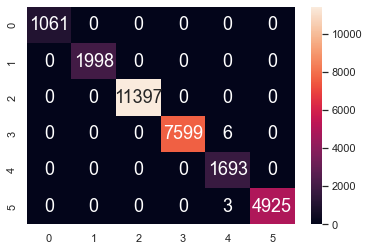

In [18]:
sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size":18})

Check the accuracy on the test data.

In [19]:
# scale the response variable for test and predict
#y_test_minmax = MinMaxScaler().fit_transform(y_test)
#y_test_minmax = y_test_minmax.astype('int64')
#y_test_normalized = (y_test-y_test.min())/(y_test.max()-y_test.min())
y_test_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test_pred, y_test)

# print accuracy
print('Accuracy of MLPClassifier on test data :', accuracy(cm))

Accuracy of MLPClassifier on test data : 0.9991632966113513
